In [1]:
# Necessary Imports 

from qqman import qqman
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Importing plink data 

plink_data = pd.read_csv("ps3_gwas.assoc.linear", delim_whitespace=True)
plink_data.head()

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
0,10,rs11252127,98087,T,ADD,207,-0.20430,-1.6060,0.1097
1,10,rs7909677,111955,G,ADD,207,0.19160,0.9108,0.3635
2,10,rs11591988,126070,T,ADD,207,-0.14700,-0.6690,0.5043
3,10,rs12768206,134767,A,ADD,207,-0.05717,-0.6032,0.5471
4,10,rs10904561,135656,G,ADD,207,-0.17850,-1.4710,0.1429


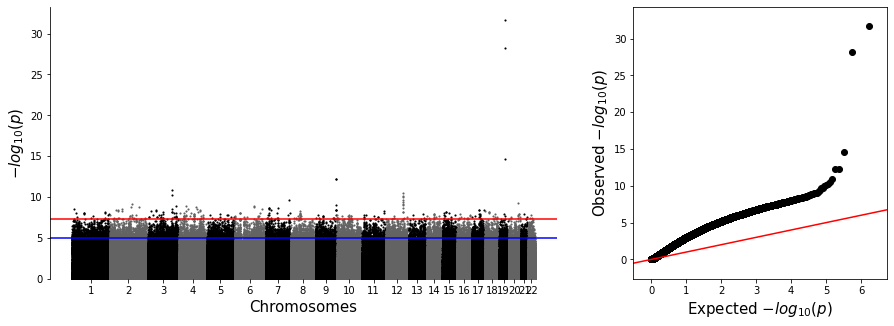

In [3]:
# QQ PLOTS for PLINK
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
fig.set_size_inches((15, 5))
qqman.manhattan(plink_data, ax=ax0)
qqman.qqplot(plink_data, ax=ax1)

In [4]:
## Getting data, and adding necessary columns (that were previously dropped ) by merging 

data = pd.read_csv("linRegResults.csv")

data = data.merge(plink_data[['SNP', 'CHR']], on='SNP', how='left')

# Now merged_data should have the chromosomes matched with SNPs from the data dataframe

data = data.merge(plink_data[['SNP', 'BP']], on='SNP', how='left')

data.rename(columns={'p-value': 'P'}, inplace=True)

# Now merged_data should have the BP matched with SNPs from the data dataframe.
data.head()

,Unnamed: 0,SNP,P,beta,CHR,BP
0,728239,rs1319484,0.999994,9.697146e-07,7,85650771
1,660203,rs3131012,0.999990,1.178195e-06,6,31115441
2,660201,rs2240063,0.999990,1.178195e-06,6,31114745
3,660200,rs2240064,0.999990,1.178195e-06,6,31114573
4,797823,rs7041298,0.999990,1.605079e-06,9,8649429


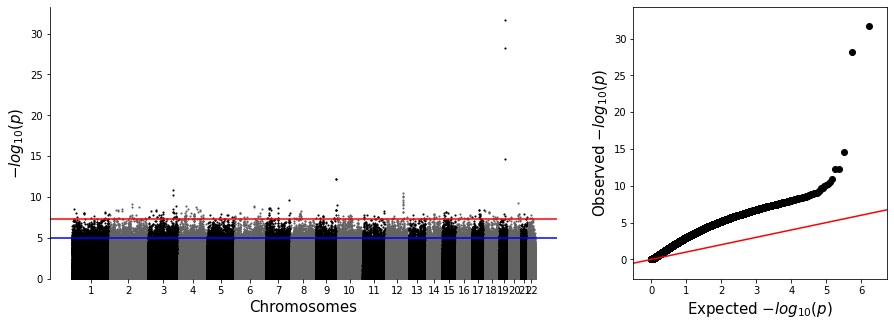

In [6]:
# QQ plots for our analysis 

fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
fig.set_size_inches((15, 5))
qqman.manhattan(data, ax=ax0)
qqman.qqplot(data, ax=ax1)